In [60]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches

rng = np.random.default_rng()

from scipy.interpolate import CubicSpline

In [61]:
hw1xdata = (-1,0,1,2,3,3.5,5,6,7,8)
hw1ydata = (-3,-1,1,3,3,1,4,2,1,1)

In [3]:
def interpolateingfuct(xinit,yinit,x1,y1,xguess):
  xmin = xinit
  xmax= x1

  ymin = yinit
  ymax = y1
  #xmin = np.min(xdata)
  #xmax = np.max(xdata)

  #ymin = np.min(ydata)
  #ymax = np.max(ydata)


  if xguess < xmin:
    return "error, guess is less than the min value in the array"
  if xguess > xmax:
    return "error, guess is more than the max value in the array"
  else:
    yguess = (((xguess-xmin)/(xmax-xmin)))*(ymax-ymin)+ymin #This should be the function just between two points, not the whole function
    #print (yguess)

    #yguess = np.interp(xguess,xdata,ydata)

    #obviously do not want to use the np.interp function, but I include it as a sanity check to make sure my function gives same result
    return (yguess)


In [4]:
test1 = interpolateingfuct(hw1xdata[0],hw1ydata[0],hw1xdata[1],hw1ydata[1],-1)
#print (test1)


#now we need to loop through at a higher resolution
xval_highres = np.linspace((np.min(hw1xdata)),(np.max(hw1xdata)),10*(len(hw1xdata)))
yval_highres = []


for i in ((xval_highres)):
  #print (i)
  for j in range (len(hw1xdata)-1):
    x_lowerbound = hw1xdata[j]
    x_upperbound = hw1xdata[j+1]

    if x_lowerbound <= i <= x_upperbound:
      y_lowerbound = hw1ydata[j]
      y_upperbound = hw1ydata[j+1]

      yval_highres.append(interpolateingfuct(x_lowerbound,y_lowerbound,x_upperbound,y_upperbound,i))
      break
print (xval_highres[8],yval_highres[8])

-0.2727272727272727 -1.5454545454545454


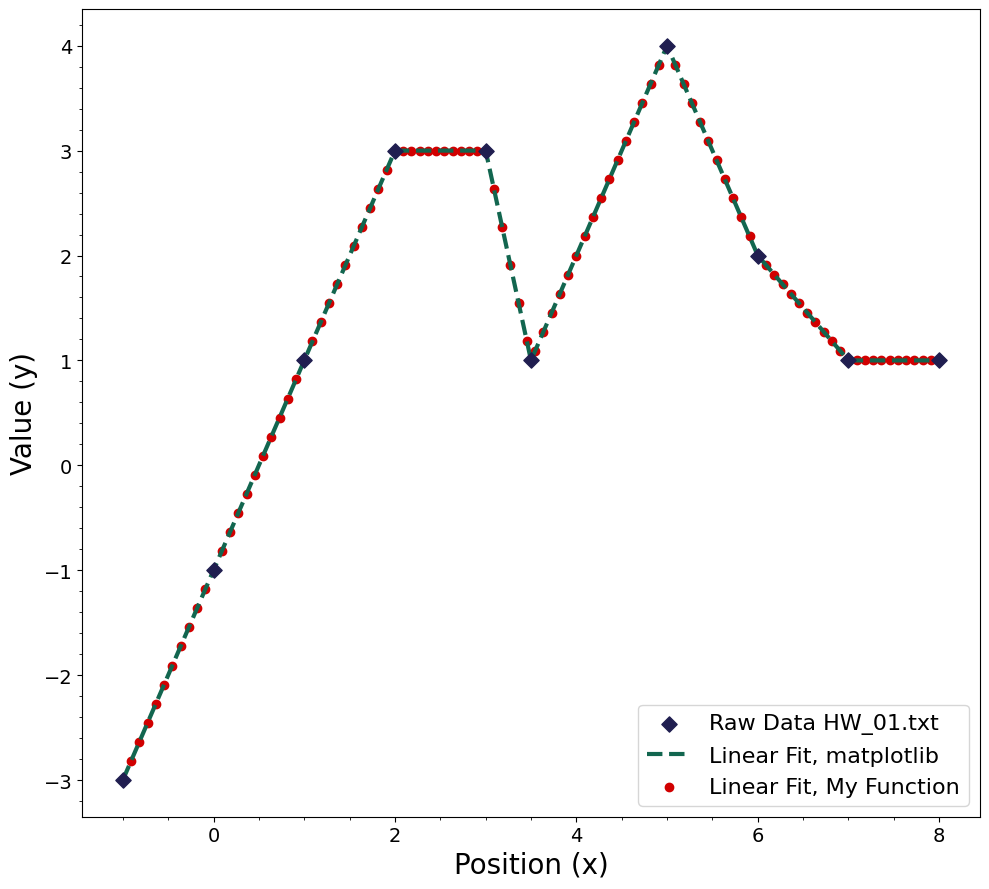

In [62]:
###Sampling to 10x resolution, this was my first attempt, may still be useful
#It is much better to do this in the for loop that I have above though
#randomarr = rng.integers(low=-1, high=8, size=100)
#print (randomarr)


#Here is the plot code for problem 1
plt.figure(figsize=(10, 9))

#here is wherer I plot the data, the first scatter is from the arrays I created at the very start of the notebook, the line below that is uses a simple matplotlib fit to extraploate the values and lastly the 2nd scatter is my linerar interp attempt
plt.scatter(hw1xdata,hw1ydata,label = 'Raw Data HW_01.txt',color='#201E50',marker = 'D', s = 60,zorder=3)
plt.plot(hw1xdata,hw1ydata,'--',label = 'Linear Fit, matplotlib',color = '#12664F',linewidth=3)
plt.scatter(xval_highres,yval_highres,color = '#D10000',label = 'Linear Fit, My Function')


#mostly matplotlib stuff below, plenty of stylistic choices to make it pretty
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.minorticks_on()
plt.xlabel("Position (x)", fontsize=20)
plt.ylabel("Value (y)", fontsize=20)
plt.legend(fontsize = 16, loc= 4)
plt.tight_layout()
plt.savefig('fig1',dpi = 300)
plt.show()

In [65]:
#Here is the plot code for problem 2b's data generation, just using scipy

Spline_Fit = CubicSpline(hw1xdata,hw1ydata)
#Now we get an array to match the len of xval_highrers bc we dont really need higher resolution than that one
#len(xval_highres)

Spline_highres = np.linspace(np.min(hw1xdata), np.max(hw1xdata), 100)

#len(Spline_highres)


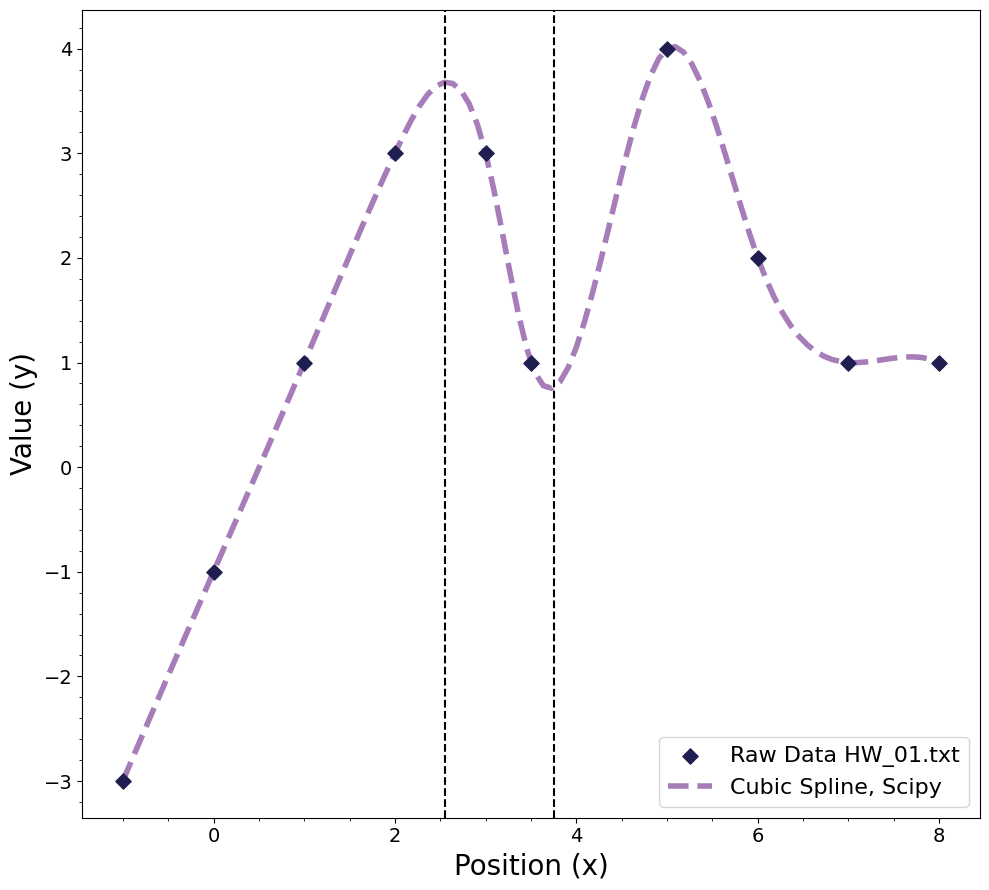

In [84]:


plt.figure(figsize=(10, 9))

#here is wherer I plot the data, the first scatter is from the arrays I created at the very start of the notebook, the line below that is uses a simple matplotlib fit to extraploate the values and lastly the 2nd scatter is my linerar interp attempt
plt.scatter(hw1xdata,hw1ydata,label = 'Raw Data HW_01.txt',color='#201E50',marker = 'D', s = 60,zorder=3)

#here is the cubic spline from scipy
plt.plot(Spline_highres,Spline_Fit(Spline_highres),'--',label = 'Cubic Spline, Scipy' ,color ='#A67DB8', linewidth = 4)

#mostly matplotlib stuff below, plenty of stylistic choices to make it pretty
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.minorticks_on()
plt.xlabel("Position (x)", fontsize=20)
plt.ylabel("Value (y)", fontsize=20)
plt.legend(fontsize = 16, loc= 4)
plt.tight_layout()

plt.axvline(x=2.55, color='black', linestyle='--')
plt.axvline(x=3.75, color='black', linestyle='--')

#plt.axhline(y=0, color='k', linestyle='-')


plt.savefig('fig2',dpi = 300)
plt.show()

# Question 3


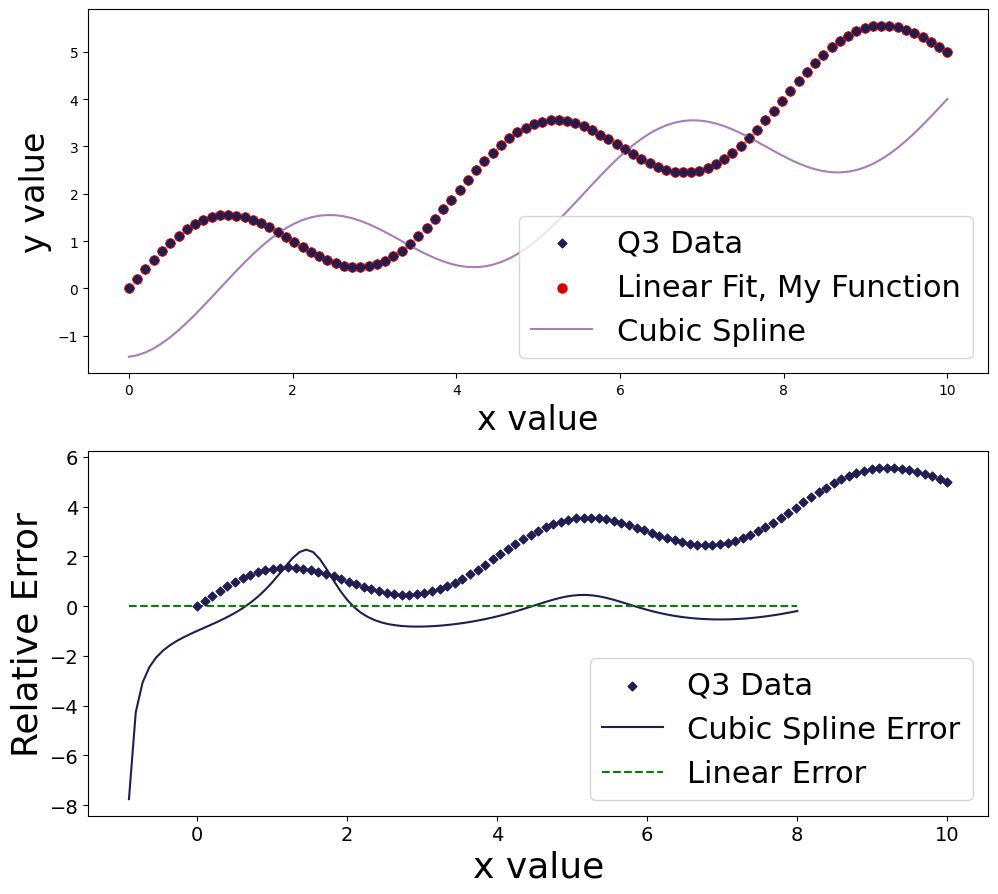

In [127]:

#Staring with the empty array so we can append to it later
truevals= []

range_integers = np.linspace(0, 10, 11)
#print (range_integers)
def q3_func(x):
  Q3_y = np.sin((np.pi / 2)*x) + (x / 2)
  return Q3_y


#oversampling
x_q3highrers = np.linspace(0, 10, 100)
y_q3val = q3_func(x_q3highrers)

for i in range (len(range_integers)):
  z = q3_func(range_integers[i])
  #print (z)
  truevals.append(z)
  #print (z)

#Now we do the two approximations

yval_linear = []
for i in x_q3highrers:
    # Loop through the original data intervals
    for j in range(len(x_q3highrers) - 1):
        x_lowerbound = x_q3highrers[j]
        x_upperbound = x_q3highrers[j+1]

        # Check if the current high-res point 'i' is in this interval
        if x_lowerbound <= i <= x_upperbound:
            y_lowerbound = y_q3val[j]
            y_upperbound = y_q3val[j+1]

            # Use your custom function
            val = interpolateingfuct(x_lowerbound, y_lowerbound, x_upperbound, y_upperbound, i)
            yval_linear.append(val)
            break

yval_linear = np.array(yval_linear)


#and the cubic one
Spline_FitQ3= CubicSpline(x_q3highrers, y_q3val)
yval_spline = Spline_FitQ3(xval_highres)

with np.errstate(divide='ignore', invalid='ignore'):
    error_linear = (yval_linear - y_q3val) / y_q3val
    error_cubic = (yval_spline - y_q3val) / y_q3val

# --- 7. Plotting ---
plt.figure(figsize=(10, 9))


plt.subplot(2, 1, 1)

plt.scatter(x_q3highrers, y_q3val, color='#201E50', marker='D', s=20, zorder=5, label='Q3 Data')

plt.scatter(x_q3highrers, yval_linear, color='#D10000', linewidth=1.5, label='Linear Fit, My Function')
plt.plot(x_q3highrers, yval_spline, color='#A67DB8', linewidth=1.5, label='Cubic Spline')
#plt.scatter(x_q3highrers, y_q3val, s=80, zorder=5, label='Sampled Data')

plt.legend(fontsize=22)
plt.ylabel("y value", fontsize=24)
plt.xlabel("x value", fontsize=24)
plt.subplot(2, 1, 2)
#plt.title("(b) Relative Error", fontsize=16)
#plt.plot(xval_highres, error_linear, 'g--', label='Linear Error')

plt.scatter(x_q3highrers, y_q3val, color='#201E50', marker='D', s=20, zorder=5, label='Q3 Data')

plt.plot(xval_highres, error_cubic, color='#201E50', label='Cubic Spline Error')
#plt.axhline(0, color='black', linewidth=1)
plt.xlabel("x value", fontsize=26)
plt.ylabel("Relative Error", fontsize=26)
plt.plot(xval_highres, error_linear, label='Linear Error', color='green', linestyle='--')
plt.legend(fontsize=22)

plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('fig3',dpi = 300)

plt.show()